In [1]:
# Data exploration
import pandas as pd

# Numerical
import numpy as np
import data_utility

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#import the functions from their corresponding files
from NYC_GetCleaned_PrecinctData import getPrecinctData
from data_utility import filterData
from NYC_GetCleaned_TotalPopulation import getMeanPopulation


0.0
0.0
0.0
0.0
0.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5835784 entries, 1 to 6039728
Data columns (total 16 columns):
CMPLNT_FR_DT         object
CMPLNT_FR_TM         object
CMPLNT_TO_DT         object
CMPLNT_TO_TM         object
RPT_DT               object
OFNS_DESC            object
PD_DESC              object
CRM_ATPT_CPTD_CD     object
LAW_CAT_CD           object
BORO_NM              object
ADDR_PCT_CD          float64
LOC_OF_OCCUR_DESC    object
PREM_TYP_DESC        object
Latitude             float64
Longitude            float64
Lat_Lon              object
dtypes: float64(3), object(13)
memory usage: 756.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
Shape_Area    77 non-null float64
Shape_Leng    77 non-null float64
Precinct      77 non-null int64
the_geom      77 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


In [3]:
#Get cleaned data from NYC_GetCleaned_HistoricData
crimes_original = getPrecinctData()
crimes_original.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,Latitude,Longitude,Lat_Lon,Shape_Area,Shape_Leng,Precinct,the_geom
0,3/30/2014,20:40:00,3/30/2014,20:50:00,3/30/2014,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE,INTENT TO",ATTEMPTED,FELONY,BRONX,44.0,INSIDE,RESIDENCE - APT. HOUSE,40.836162,-73.915250,"(40.836161968, -73.915249813)",5.553055e+07,31394.624816,44,MULTIPOLYGON (((-73.90270221290083 40.84458296...
1,4/1/2014,15:00:00,4/1/2014,15:05:00,4/1/2014,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ATTEMPTED,FELONY,BRONX,44.0,INSIDE,STREET,40.825000,-73.916615,"(40.825000207, -73.916615377)",5.553055e+07,31394.624816,44,MULTIPOLYGON (((-73.90270221290083 40.84458296...
2,4/6/2014,14:45:00,4/6/2014,14:45:00,4/6/2014,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ATTEMPTED,FELONY,BRONX,44.0,INSIDE,STREET,40.830013,-73.918112,"(40.830013132, -73.918112312)",5.553055e+07,31394.624816,44,MULTIPOLYGON (((-73.90270221290083 40.84458296...
3,5/6/2014,14:00:00,5/6/2014,14:05:00,5/6/2014,GRAND LARCENY OF MOTOR VEHICLE,"LARCENY,GRAND OF AUTO",ATTEMPTED,FELONY,BRONX,44.0,INSIDE,STREET,40.828608,-73.921742,"(40.828607613, -73.92174192)",5.553055e+07,31394.624816,44,MULTIPOLYGON (((-73.90270221290083 40.84458296...
4,3/6/2014,23:42:00,3/6/2014,23:42:00,3/7/2014,POSSESSION OF STOLEN PROPERTY,"STOLEN PROPERTY 2,1,POSSESSION",ATTEMPTED,FELONY,BRONX,44.0,INSIDE,STREET,40.838752,-73.913758,"(40.83875187, -73.913757556)",5.553055e+07,31394.624816,44,MULTIPOLYGON (((-73.90270221290083 40.84458296...


In [4]:
#Get a list of NYC Boroughs
borolist = (crimes_original['BORO_NM'].unique()).tolist()


['BRONX', 'MANHATTAN', 'BROOKLYN', 'QUEENS', 'STATEN ISLAND']

In [5]:
#Get the list of number of precinct in each borough
totalPrecinct = len(crimes_original['Precinct'].unique().tolist())

In [6]:
#Get the list of area of each borough
totalAreaNYC = int(sum(crimes_original['Shape_Area'].unique().tolist()))


8426665066

In [26]:
#Define the arrays  
areaList = []
countlist = []
pop = []
popPercent=[]

In [8]:
def getPrecinctCount(borolist):
        countlist.clear()
        for boro in borolist:
            boro_data = filterData(crimes_original,'BORO_NM', boro)
            precinctCount = len(boro_data['Precinct'].unique().tolist())*100/totalPrecinct
            countlist.append(round(precinctCount,2))
        return countlist

In [9]:
def getArea(borolist):
        areaList.clear()
        for boro in borolist:
            area_data = filterData(crimes_original,'BORO_NM', boro)
            area = sum(area_data['Shape_Area'].unique().tolist())*100/totalAreaNYC
            areaList.append(round(area,2))
        return areaList

In [10]:
def getPopulation(borolist):
    pop.clear()
    popPercent.clear()
    i=1
    for boro in borolist:
        popValue = getMeanPopulation(boro,i)
        pop.append(popValue)
        i = i+1
    popsum = int(sum(pop))
    for value in pop:
        popPercentValue = value*100/popsum
        popPercent.append(round(popPercentValue,2))
    return popPercent    
    


In [13]:
precinct_boro = pd.DataFrame({'Boroughs':borolist,'Precinct (%)':getPrecinctCount(borolist),'Area (%)':getArea(borolist),'Population (%)':getPopulation(borolist)})

In [15]:
precinct_boro['Precinct/Area'] = precinct_boro['Precinct (%)']/precinct_boro['Area (%)']

In [27]:
precinct_boro['Precinct/Population'] = precinct_boro['Precinct (%)']/precinct_boro['Population (%)']

In [16]:
precinct_boro

,Boroughs,Precinct (%),Area (%),Population (%),Precinct/Population,Precinct/Area
0,BRONX,22.08,18.47,16.86,1.309609,1.195452
1,MANHATTAN,31.17,10.86,30.97,1.006458,2.870166
2,BROOKLYN,40.26,34.54,19.20,2.096875,1.165605
3,QUEENS,20.78,36.41,27.27,0.762010,0.570722
4,STATEN ISLAND,5.19,19.27,5.69,0.912127,0.269331


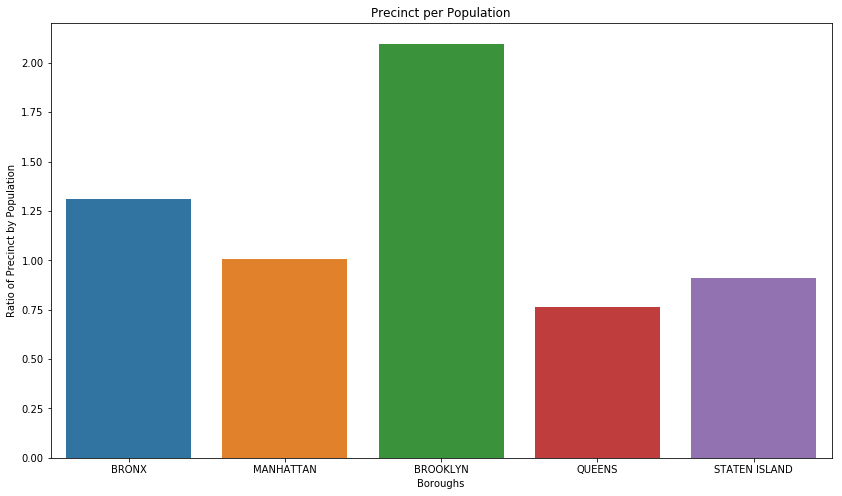

In [23]:
a4_dims = (14, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='Boroughs', y='Precinct/Population', data=precinct_boro, ax=ax)
plt.ylabel('Ratio of Precinct by Population')
plt.title('Precinct per Population')
plt.show()

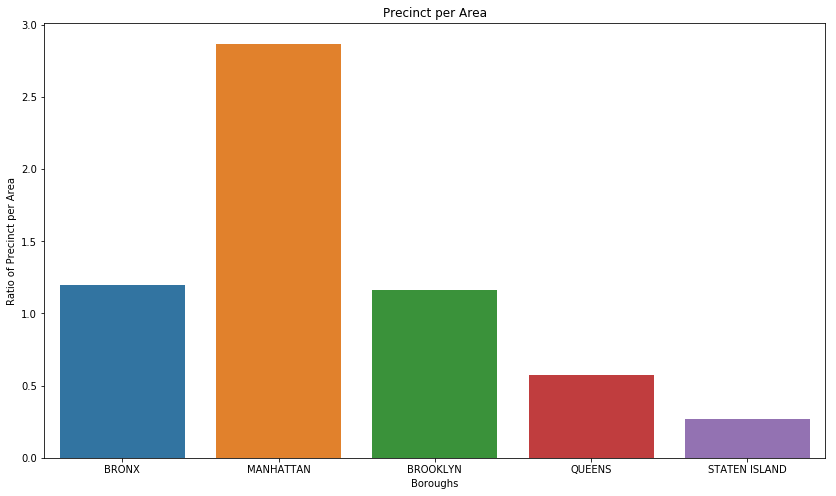

In [22]:
a4_dims = (14, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='Boroughs', y='Precinct/Area', data=precinct_boro, ax=ax)
plt.ylabel('Ratio of Precinct per Area')
plt.title('Precinct per Area')
plt.show()

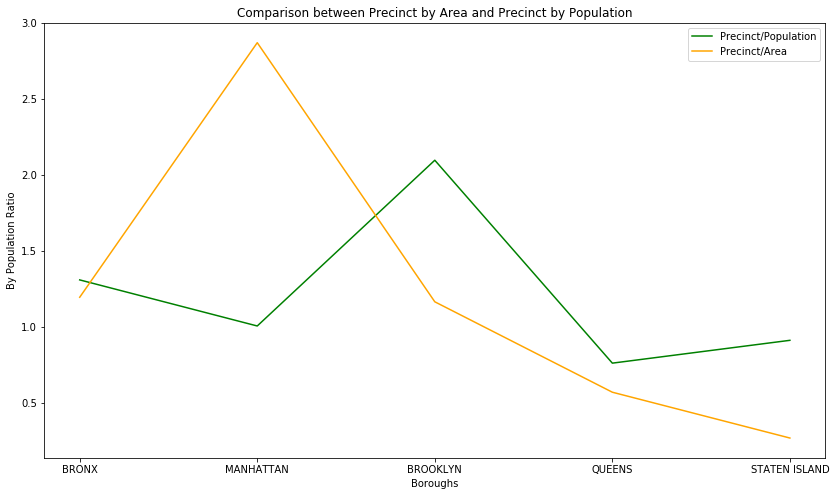

In [25]:
a4_dims = (14, 8)
fig, ax = plt.subplots(figsize=a4_dims)
plt.plot(precinct_boro['Boroughs'], precinct_boro['Precinct/Population'], color='g')
plt.plot(precinct_boro['Boroughs'],precinct_boro['Precinct/Area'], color='orange')
plt.xlabel('Boroughs')
plt.ylabel('By Population Ratio')
plt.title('Comparison between Precinct by Area and Precinct by Population')
plt.legend()
plt.show()